# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: traffic-analysis-and-prediction

## Description

 The Intelligent Transportation System (ITS) is part of several smart city applications where it enhances the processes of transportation and commutation. ITS aims to solve traffic problems, mainly traffic congestion. In recent years, new models and frameworks for predicting traffic flow have been rapidly developed to enhance the performance of traffic flow prediction, alongside the implementation of Artificial Intelligence (AI) methods such as machine learning (ML). In this project we are trying to analysis and predict the traffic and junction label.  

## Learning Objectives

At the end of the mini project, you will be able to understand-
 
* convert the dataset to time series dataset
* predict the flow of traffic at any junction



In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the dataset (1 marks)

In [ ]:

from google.colab import files
  
  
uploaded = files.upload()

Saving traffic.csv to traffic.csv


In [ ]:
# import the data and print random 5 observations ? 

# YOUR CODE HERE

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


#### Extract Year, Month, Day, Hour from index 


In [ ]:
# extract year from date

# YOUR CODE HERE

# extract month from date


# extract day from date
# YOUR CODE HERE

# extract hour from date
# YOUR CODE HERE
df.head()

Drop the ID column

In [ ]:
# Drop the ID column
# YOUR CODE HERE

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0
2015-11-01 01:00:00,1,13,2015,11,1,1
2015-11-01 02:00:00,1,10,2015,11,1,2
2015-11-01 03:00:00,1,7,2015,11,1,3
2015-11-01 04:00:00,1,9,2015,11,1,4
...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,2017,6,30,19
2017-06-30 20:00:00,4,30,2017,6,30,20
2017-06-30 21:00:00,4,16,2017,6,30,21


### Data Exploration (4 marks)



#### Draw the histogram (1 marks)

In [ ]:
# Plot the histogram for every junctions Vechicle Vs probability (1 marks)

# YOUR CODE HERE


#### time series plot (1 marks)

In [ ]:
# Plot the time series data at every junctions Datetime Vs Vehicles (1 marks)
# YOUR CODE HERE

#### Normal data histogram

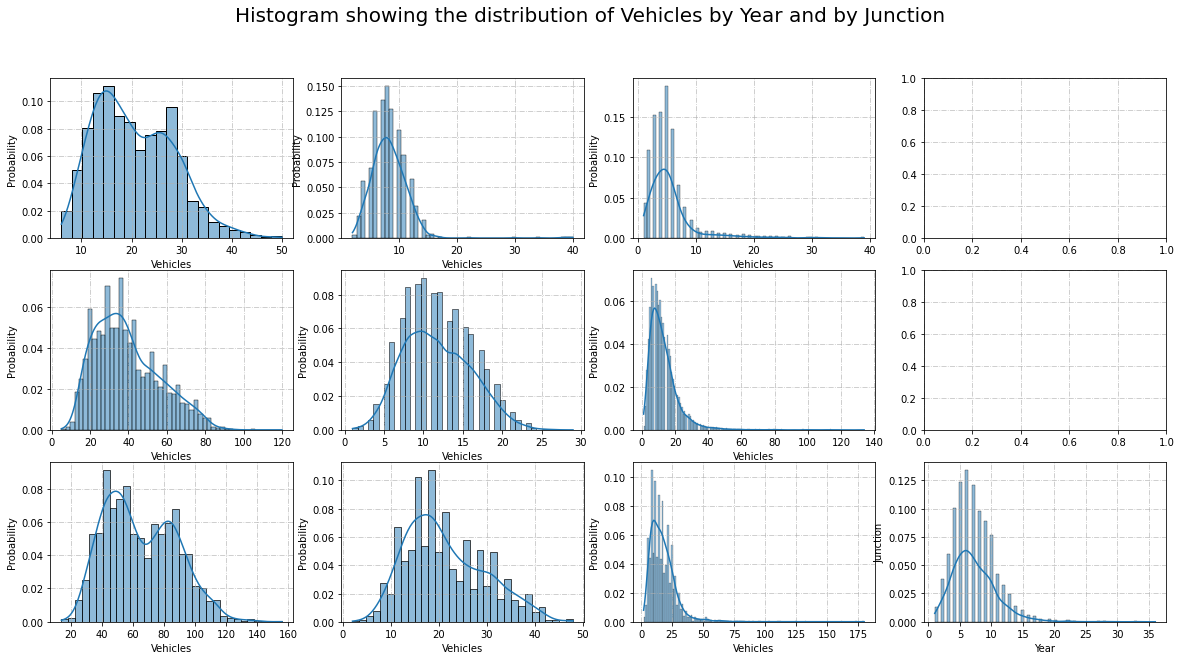

In [ ]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction', fontsize=20)
plt.show()

#### Data Engineering : (1 Mark)
- Scale the Data using `StandardScaler`
- Compute the Score data distribution 
- Plot the Histogram with Z Score Vehicles from the Data with (Mean = 0 and Standard Deviation = 1)

In [ ]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [ ]:
# Standardize the data with mean=0 and Standard Deviation=1 (Z Score data distribution)
# YOUR CODE HERE

In [ ]:
# Plot the histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score.
# YOUR CODE HERE

#### Visualization : (1 Mark)

On a single Picture, display the number of vehicles on Y axis with X axis as the Junctions, with each subplot being a BoxPlot/ViolinPlot

In [ ]:
# plot the boxplot to find the outliers (1marks)

# YOUR CODE HERE

In [ ]:
def get_list_data(dataf, drop=[]):

  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [ ]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01         3  2017      1    1     0


In [ ]:
# Plot  the amounts of Vehicles by Junction with each Junction by day (First covert the observations hourly to day then plot the time series data days vs vehicle ) 1 marks

# YOUR CODE HERE

### Modeling (2 marks)

Create a make metrics function to return R² Score and RMSE from a list of models

In [ ]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

Create a function to create a new dataset

In [ ]:
z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


#### Training models for 4 junction with normal data and find R2 score and RSME score (1 marks)

(use SVR, LinearRegressor, RandomforestRegressor) 

In [ ]:
 # YOUR CODE HERE

#### Training models for 4 junction with Z Score Normalization and find R2 score and RSME score (1 marks)

In [ ]:
# YOUR CODE HERE

Create lag data

In [ ]:
lag_df = df.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = df.Vehicles.shift(i)

# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

,Junction,Vehicles,Year,Month,Day,Hour,Vehicles_lag_1,Vehicles_lag_2
DateTime,,,,,,,,
2015-11-01 02:00:00,1,10,2015,11,1,2,13.0,15.0
2015-11-01 03:00:00,1,7,2015,11,1,3,10.0,13.0
2015-11-01 04:00:00,1,9,2015,11,1,4,7.0,10.0
2015-11-01 05:00:00,1,6,2015,11,1,5,9.0,7.0
2015-11-01 06:00:00,1,9,2015,11,1,6,6.0,9.0


In [ ]:
lag_data = get_list_data(lag_df, drop=['Year'])
for i in lag_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Month, Day, Hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  Hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3

Lag data is appropriate for time series data, use for create the auto correlation

In [ ]:
lag_models = [None]
for i in range(1, 5):
    lag_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i} with lag data',
            data=lag_data[i],
            predict_features='Vehicles',
            test_size=1/3
        )
    ]

make_metrics(lag_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.966181,4.258314
1,average R2 and sum RMSE,0.884177,2.534541
2,average R2 and sum RMSE,0.745500,5.261899
3,average R2 and sum RMSE,0.494355,2.557743
4,average R2 and sum RMSE,0.772553,14.612498


#### Feature importances of a model 

*The correlate value as close as 1 is best*

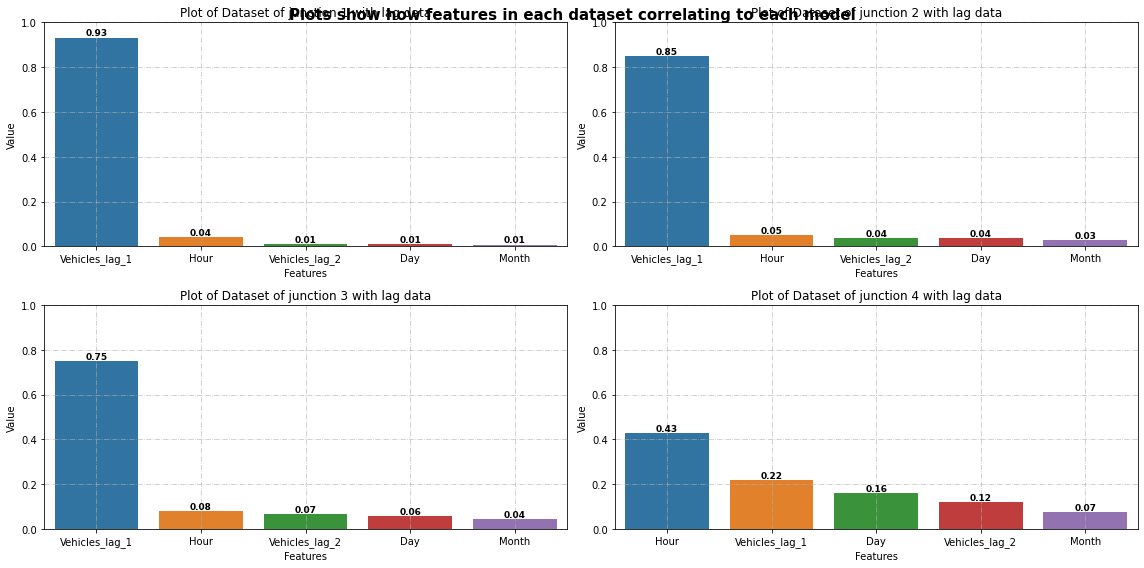

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
k = 1
for i in range(2):
    for j in range(2):
        lag_models[k].feature_importances(ax[i, j])
        k += 1
f.suptitle('Plots show how features in each dataset correlating to each model', fontsize=15, fontweight='bold')        
f.tight_layout()

### Predict the vehicle traffic for next 2 months (3 MARKS)



In [ ]:
# your code here